In [5]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import yaml
import pprint
#from OrderParameter import *

# SAMULI: Also this should be maybe moved to the external code that will be imported
# Download link
def download_link(doi, file):
    if "zenodo" in doi.lower():
        zenodo_entry_number = doi.split(".")[2]
        return 'https://zenodo.org/record/' + zenodo_entry_number + '/files/' + file
    else:
        print ("DOI provided: {0}".format(doi))
        print ("Repository not validated. Please upload the data for example to zenodo.org")
        return ""





/media/akiirikk/DATADRIVE1/tietokanta/expDATABANK/Data/QualityEvaluation/1b2/6e6/1b26e6c750b4f39c37770422cd4d3c40240cf111/995bc873b811ca09c916b47784fa33bb9d793732/POPS_OrderParameters.json
/media/akiirikk/DATADRIVE1/tietokanta/expDATABANK/Data/QualityEvaluation/25a/ce9/25ace931487aad89f9e755125358282fe99d8ea8/7ce1e2a0f5027d28b81cab28c850ef64d5c9aff5/POPC_OrderParameters.json
/media/akiirikk/DATADRIVE1/tietokanta/expDATABANK/Data/QualityEvaluation/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6/POPC_OrderParameters.json
/media/akiirikk/DATADRIVE1/tietokanta/expDATABANK/Data/QualityEvaluation/a63/ca7/a63ca7001cbd5cfc328da122668d1aebc00f2c91/220540156a6ac7813942fd01d998a491b6ff9b8b/POPC_OrderParameters.json
/media/akiirikk/DATADRIVE1/tietokanta/expDATABANK/Data/QualityEvaluation/b06/79c/b0679cd5bb4bed509b91a002305d2771ed4ad54e/72ec31258e95aefa0d053131b9e734b4b11eb030/POPC_OrderParameters.json
/media/akiirikk/DATADRIVE1/tietokanta/expDATABANK/Data/

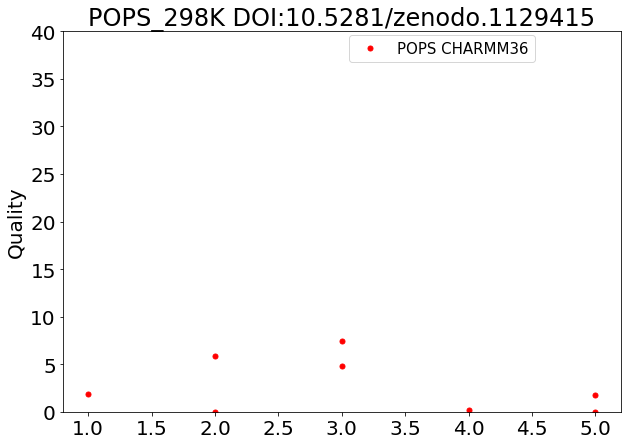

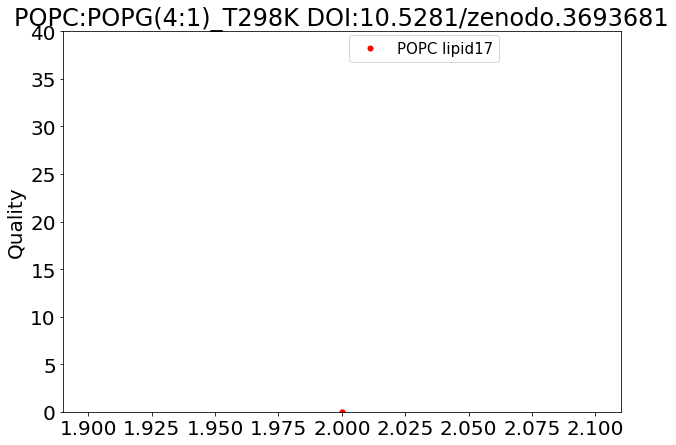

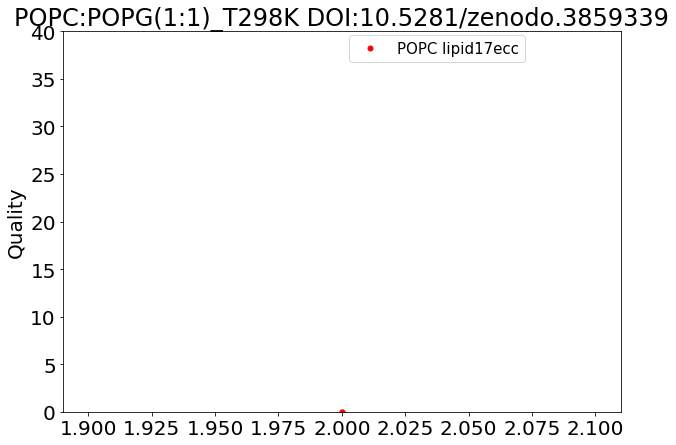

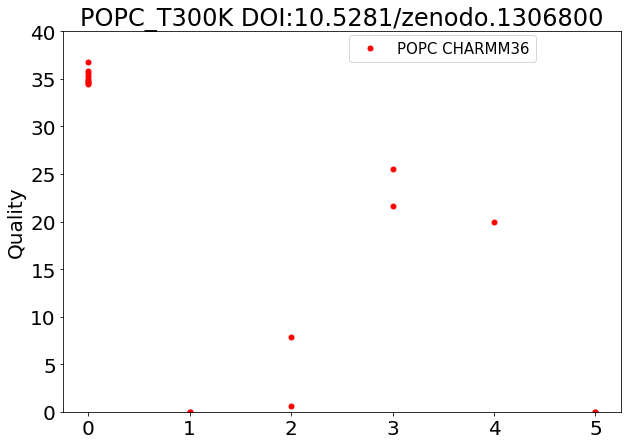

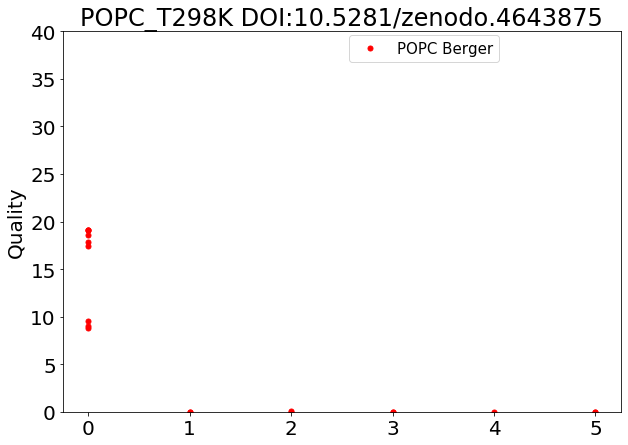

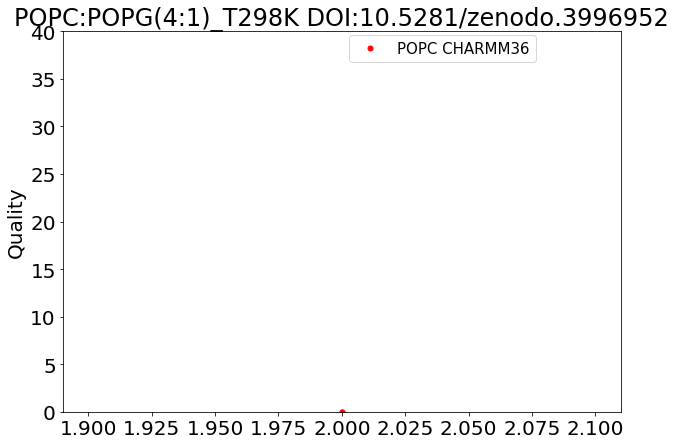

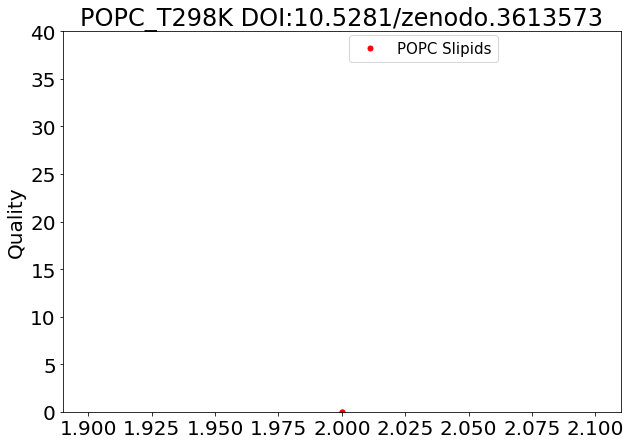

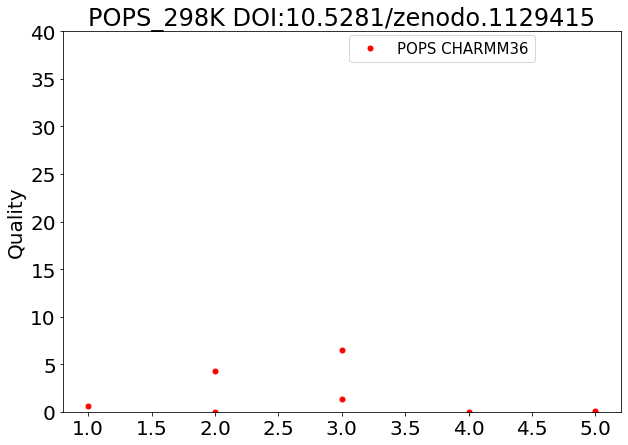

In [11]:
# Demonstration of reading the databank
# Currently lists some information on the simulations in the databank

# List of lipids that will be analyzed

lipids = {'POPC', 'POPG','POPE','POPS'} 

# This walks through the files in the databank
# Dictionaries saved as README.yaml are read into 'readme' dictionary
count = 0

for subdir, dirs, files in os.walk(r'/media/akiirikk/DATADRIVE1/tietokanta/expDATABANK/Data/QualityEvaluation/'):
    for filename1 in files:
        filepath1 = subdir + os.sep + filename1
        readme = {}
        if filepath1.endswith("README.yaml"):
            READMEfilepath = subdir + '/README.yaml'
            with open(READMEfilepath) as yaml_file:
                readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
            yaml_file.close()
           # print(readme)
            OPdata = {}
            for filename2 in files:
                filepath2 = subdir + os.sep + filename2
                if filepath2.endswith("_OrderParameters.json"):
                    lipid = filename2.replace('_OrderParameters.json', '')
                    print(filepath2)
                    with open(filepath2) as json_file:
                        OPdata[lipid] = json.load(json_file)
                    json_file.close()
                  #  print(OPdata)
            
                    for key1 in OPdata.keys():
                       # print(readme)
                        data = OPdata[key1]
                        doi = readme['DOI']
                       # try:
                       #     sim_label = lipid + " " + readme.get('SYSTEM') + readme.get('FF')
                       # except TypeError:
                       #     sim_label = lipid + " " + readme.get('SYSTEM')
                        fig= plt.figure(figsize=(10,7))
                        for key2,value in data.items():
                            
                            plt.gca().invert_yaxis()
                       
                            if lipid == 'POPG' and 'M_G3C6_M' in key2:
                                plt.plot(0,value[3],"s", color='red',marker=".", markersize=10)  #color=colors[i],
                            if 'M_G3N6' in key2:        
                                plt.plot(0,value[3],"s",color='red',marker=".", markersize=10)
                            if 'M_G3C5_M' in key2:
                                plt.plot(1,value[3],"s",color='red',marker=".", markersize=10)
                            if 'M_G3C4_M' in key2:
                                plt.plot(2,value[3],"s",color='red', marker=".", markersize=10)
                            if 'M_G3_M' in key2:
                                plt.plot(3,value[3],"s",color='red',marker=".", markersize=10)
                            if 'M_G2_M' in key2:
                                plt.plot(4,value[3],"s",label= lipid + " " + readme.get('FF'),color='red', marker=".", markersize=10)
                            if 'M_G1_M' in key2:
                                plt.plot(5,value[3],"s",color='red',marker=".", markersize=10)
            
                        plt.legend(loc='upper left',ncol=2, fontsize=15, bbox_to_anchor=(0.5, 1.01))
                        plt.ylabel('Quality', fontsize=20)
                        plt.xticks(fontsize=20)
                        plt.yticks(fontsize=20)
                        plt.ylim(0,40)
                        plt.title(readme['SYSTEM'] + " DOI:" + doi, fontsize=24)
        
                
                
                